In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [20]:

df = pd.read_csv('Car details v3.csv')

In [21]:
df.head()

df.shape

(8128, 13)

In [ ]:
df.isnull().sum()




name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [32]:
df.describe().astype(int)

,year,selling_price,km_driven,seats
count,8128,8128,8128,7907
mean,2013,638271,69819,5
std,4,806253,56550,0
min,1983,29999,1,2
25%,2011,254999,35000,5
50%,2015,450000,60000,5
75%,2017,675000,98000,5
max,2020,10000000,2360457,14


In [33]:
df['mileage'] = df['mileage'].str.extract(r'([\d.]+)').astype(float)

# 2. Clean and convert 'engine' (e.g., "1248 CC" → 1248.0)
df['engine'] = df['engine'].str.extract(r'([\d.]+)').astype(float)

# 3. Clean and convert 'max_power' (e.g., "74 bhp" → 74.0)
df['max_power'] = df['max_power'].str.extract(r'([\d.]+)').astype(float)

# 4. Optional: Extract numeric torque value (e.g., "190Nm@ 2000rpm" → 190.0)
df['torque'] = df['torque'].str.extract(r'([\d.]+)').astype(float)

# Confirm conversion
print(df[['mileage', 'engine', 'max_power', 'torque']].dtypes)

mileage      float64
engine       float64
max_power    float64
torque       float64
dtype: object


In [34]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0


In [38]:
df['name'].unique().size

2058

In [41]:
df.describe().astype(int)

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,8128,8128,8128,7907,7907,7912,7906,7907
mean,2013,638271,69819,19,1458,91,168,5
std,4,806253,56550,4,503,35,97,0
min,1983,29999,1,0,624,0,4,2
25%,2011,254999,35000,16,1197,68,101,5
50%,2015,450000,60000,19,1248,82,154,5
75%,2017,675000,98000,22,1582,102,202,5
max,2020,10000000,2360457,42,3604,400,789,14


In [43]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64

In [44]:
df['mileage'].fillna(df['mileage'].median(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['max_power'].fillna(df['max_power'].median(), inplace=True)
df['torque'].fillna(df['torque'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)


/var/folders/tj/h7d58dsn3tv22_3h4nxcdj6w0000gn/T/ipykernel_36211/3305077169.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].median(), inplace=True)
/var/folders/tj/h7d58dsn3tv22_3h4nxcdj6w0000gn/T/ipykernel_36211/3305077169.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [45]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [51]:
X = df.drop(['selling_price'] , axis = 1)
Y = df['selling_price']

x_train ,x_test , y_train , y_test =  train_test_split(X,Y , test_size=0.3 , random_state=42)

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8128 non-null   object 
 1   year          8128 non-null   int64  
 2   km_driven     8128 non-null   int64  
 3   fuel          8128 non-null   object 
 4   seller_type   8128 non-null   object 
 5   transmission  8128 non-null   object 
 6   owner         8128 non-null   object 
 7   mileage       8128 non-null   float64
 8   engine        8128 non-null   float64
 9   max_power     8128 non-null   float64
 10  torque        8128 non-null   float64
 11  seats         8128 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 762.1+ KB


In [53]:

categorical_col  = ['fuel','seller_type', 'transmission', 'owner', 'name']
numerical_col = [col for col in X.columns if col not in categorical_col]


x_train_encoded = pd.get_dummies(x_train, columns=categorical_col, drop_first=True)
x_test_encoded =  pd.get_dummies(x_test , columns=categorical_col, drop_first=True)




In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestRegressor


x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)


rf_model = RandomForestRegressor()
rf_model.fit(x_train_encoded , y_train)

prediction = rf_model.predict(x_test_encoded)

print(rf_model.score(x_test_encoded, y_test))

0.9581234529083155


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

df = pd.read_csv('Car details v3.csv')


#-------------------------------------------XXXXXXXXXXXXXXX------------------------------------#
# MODEL TRANSFORMATION , EDA


df['mileage'] = df['mileage'].str.extract(r'([\d.]+)').astype(float)

# 2. Clean and convert 'engine' (e.g., "1248 CC" → 1248.0)
df['engine'] = df['engine'].str.extract(r'([\d.]+)').astype(float)

# 3. Clean and convert 'max_power' (e.g., "74 bhp" → 74.0)
df['max_power'] = df['max_power'].str.extract(r'([\d.]+)').astype(float)

# 4. Optional: Extract numeric torque value (e.g., "190Nm@ 2000rpm" → 190.0)
df['torque'] = df['torque'].str.extract(r'([\d.]+)').astype(float)





df['mileage'].fillna(df['mileage'].median(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['max_power'].fillna(df['max_power'].median(), inplace=True)
df['torque'].fillna(df['torque'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)



X = df.drop(['selling_price'] , axis = 1)
Y = df['selling_price']

x_train ,x_test , y_train , y_test =  train_test_split(X,Y , test_size=0.3 , random_state=42)
#-------------------------------------------XXXXXXXXXXXXXXX------------------------------------#
# MODEL TRAINER - 

categorical_col  = ['fuel','seller_type', 'transmission', 'owner', 'name']
numerical_col = [col for col in X.columns if col not in categorical_col]


x_train_encoded = pd.get_dummies(x_train, columns=categorical_col, drop_first=True)
x_test_encoded =  pd.get_dummies(x_test , columns=categorical_col, drop_first=True)





x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)


rf_model = RandomForestRegressor()
rf_model.fit(x_train_encoded , y_train)


prediction = rf_model.predict(x_test_encoded)

print(rf_model.score(x_test_encoded, y_test))




/var/folders/tj/h7d58dsn3tv22_3h4nxcdj6w0000gn/T/ipykernel_36211/1797539849.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].median(), inplace=True)
/var/folders/tj/h7d58dsn3tv22_3h4nxcdj6w0000gn/T/ipykernel_36211/1797539849.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

0.9599743451066534


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("R² Score:", r2_score(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))
print("RMSE:", np.sqrt(mean_squared_error(y_test, prediction)))

R² Score: 0.9599743451066534
MAE: 68953.91237052303
RMSE: 166048.5226360161


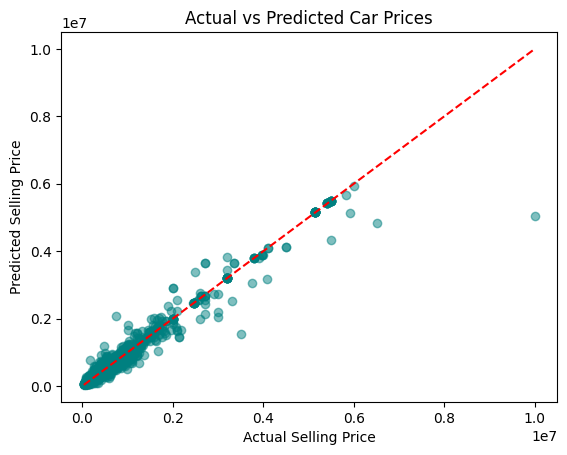

In [74]:
import matplotlib.pyplot as plt

plt.scatter(y_test, prediction, alpha=0.5, color='teal')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
